<h1 style="background-color:#f5c0c0;"> Word Vizz - More like Word Wizard :)  </h1>

<div class="row">
  <div class="column">
      <img  src='http://wyrk.com/files/2017/11/Word-Wizard.jpg?w=980&q=75' alt="Hope" style="width:100%" height="200" width="200">
  </div>
  <div class="column">
    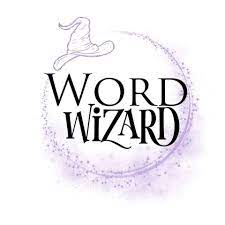
  </div>
</div>

<h1 style="background-color:#7FDBFF;"> Importing Packages </h1>

In [1]:
# Package for tackling with math problems and datasets
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Packages for images 
import cv2
from PIL import Image

# Package for requests
import requests

# Packages for change in markdown 
from IPython.display import HTML
from colorama import Fore as f

# Packages to preprocess the data
import re

# Packages for removing some unwanted outputs("warnings")
import warnings
warnings.filterwarnings("ignore")

# Adding Custom Utility Scripts
from word_vizzz import *
from nlp_package_pv import *

# Making a script to change the css and some of the formats in th
HTML("""
<style>
h1,h2,h3 {
	margin: 1em 0 0.5em 0;
	font-weight: 600;
	font-family: 'Titillium Web', sans-serif;
	position: relative;  
	font-size: 36px;
	line-height: 40px;
	padding: 15px 15px 15px 15%;
	color: #355681;
	box-shadow: 
		inset 0 0 0 1px rgba(53,86,129, 0.4), 
		inset 0 0 5px rgba(53,86,129, 0.5),
		inset -285px 0 35px white;
	border-radius: 0 10px 0 10px;
	background: #fff ;
    
}
/* Three image containers (use 25% for four, and 50% for two, etc) */
.column {
  float: left;
  width: 50%;
  padding: 5px;
}

/* Clear floats after image containers */
.row::after {
  content: "";
  clear: both;
  display: table;
}

</style>""")

<h1 style="background-color:#e4bad4;">Plots Covered Till Now  </h1>

<h3> 1) Solar Plot <br>
    2) Word Cloud <br>
    3) Length N Color Plot <br>
    4) Parellal Word Chart <br>
    5) Sunburst Plot <br>
    6) Link Plot <br>

<h1 style="background-color:#d8ebe4;">Importing Data And Transforming It</h1>


In [2]:
data=pd.read_csv('../input/reddit-vaccine-myths/reddit_vm.csv')
text=data['title']+' '+data['body'].astype(str)
data['text']=text
data=rem_stopwords_tokenize(data,'text')
data=make_sentences(data,'text')

<h1 style="background-color:#a0c1b8;">Solar Plot</h1>

### This plot will show you the top n highest occuring words in a solar revolving manner . Just a different way of depicting frequency plot :)

In [3]:
path='data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBw0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ8NDQ0NFREWFhURExMYHSggGBolGxUTITUhKCkrLi4uFx8zODUtNzQtLisBCgoKDg0OFQ8QFSsdFR0tKy0tLSsrLi0rLSstLS0tKystKysrLS0rLSstKysrLSstLTMtLSsrLS0rKy0rKy0rLf/AABEIAKgBKwMBEQACEQEDEQH/xAAbAAEBAQEAAwEAAAAAAAAAAAAAAQIDBAUGB//EADYQAQACAQIEAwQIBQUAAAAAAAABAhEDBAUSITFBUXEGE4GRIjJCUmFiseEHFCNDoRVywdHw/8QAGgEBAQEBAQEBAAAAAAAAAAAAAAECAwQFBv/EADARAQACAgEDAwIEBQUBAAAAAAABAgMRBBIhMQVBURMiMmGRoUJxsdHwFCNSgcEV/9oADAMBAAIRAxEAPwD8OFABQBAAAAABQABQFFEFFAAAIFUUFBNKiiiCAgAKCgKgYDQogAOcw04TGpABQBAAAAAABQBQCBVQUWAUBFZEWFFhoaAEAUERQEABVQBdAKKCaQQBMKmnNpxBRAAAABQQAFAFAUUBpGkVARAUWFhFhRoAhFhRQRMKAgAKqKAAAoqCaBEBybecFEAAAAFBAWABQFAFWBYawul2YXTO0wukMGjZhnTUCNKigLCLCjRgDAhgEwGgNKALoAAARUVkEcW3AAQAAAAAAUAUBRWoq1FU23ENLBMBJyrpNnKaTZyrpNnKzMNQYZmG4MMtJhFWIRdLgaEBTQgKgAimAMAAASKkqygji284gAAAAAAAoAqxCwjUQ1EDTQ1WBqG4q1EJMtRRuKyxteRrpZ2cidJs5GZq3EpNGZhuJZmrEw1Es8rEw3BhhuFF0YAwioISCCLgXSi6QQEQFFSQlFZcG3mEAAAAAAAFFFGoaRqFGohR206ZdK1TqeXo7fL00xbcL5NPP0uHTMdnrrxZl5rciIdP9HvPasz8HT/RW9ocv9XX3lm/B9av9u0x6S524eSP4W68vHP8ThOxt2xMT5YcZwT8O8ZoePfbTHeHG2KYd65IlwvpTDhamnattuU0cZh1iWcOUukGEaMCxCIJIgCCAAoAIAASEoI8d0eUQAAAAAAWAAWGoGoUahpHWlW6wzMvK0avRWHOZey2kRl7sMPNkfQ8Lm2pPJo6c6k9pntSPWX1MWWNdo3/AEfK5MRSN3tqP3fTU4TakZ19aunPf3enXmv8u/zw6/Xm34Y3/R8ieTFp/wBum4+Z8f5+pOjto6c259cV/TmOq/5fq3H1v+Nf8/6L8G0dxGKasTbwjVryzn1/djJbt99eyRzMmGd2r2/J87xLgt9G801KTWfCZ/78Yea2Kto3HeH1+Nza5K9VZej3fD5jPTs8Obj6fVw59vVauhh8++N762eLemHkvGnprO2cObogMygzIygiCLAoKACAAAII8d0eUQAAAAAAWAFFhRqGhuqwku1HarnLydOXerEvfcI4f7yazqZxP1dOO9vxl9Ti8br1N/Hx/d4ORyOiJinn5foWpfT4ZoVjEV1rVziIj+lXHaPx/F6L3rPfxjjxHy/M48V+flnv9kfu+K4p7UXnOLcsZ+zPf1nxfOzeoTHidR+T9Rx/TcdI7Rufzeln2nvE9JvPxz+rx/8A0LPVPCrL3fBfamt7RW84nznt8Xu4/qEWnUvn8r07UTMRuH6Htfd77R91qfWiP6dp6zWfL0e209E9dfE+YflskX4uTrr493zfE+FzXmraOtOk+nhLtatb13D7fG5MW1MeJfI8Q23LM9Hx8+PUy/QYL9UPUa+n0y+dkr2fQxz3eJLyy9DMoSzIjEoygiCNI0KIAIqKyrKggPHdHlEAAAAAAFAUVRqFG6twzLrWXWGZeZsaxNome1fDzl6sFYm258Q4ZZ1Go8y++9g9v7/dRa31NKJ1J8unb/OH1ovP07W+ez876vk+lh6Y827PWe2XFLautq2mfo804jzjwh87nZen7I8Q+v6VxIxYqx7vhtxqzecz8vJ8aZ33fZ8dnDKI1p2xMT2mDa+X65/DziM6ulSZnrWeWfh+0v0XDyfVwd/MPyPrXHitp14fZcY2PPm8R/bnPrExh24+XX2z8vh8PN06r+b8445t8TKcuj9lwsm4fMalOkvj2r5fYiXrbx1eC0d3riWEGbIjnMozMsiANI0AKAQkhKDAKgODo8ogAAAAAAqgCqNQo3VuEbiWolHm6NsRWPi9uOdREPPaNzMv0v8AhtXEa0fatpTj5vra1hr/ADfk/XZ70n2iXyHtZp4vWv5Yz6+P+Xx/UY1k0/V+n36sW3y2vTERP4y+dMae2J3LhMMi1hFh+ofw02tq6UTPfUvmsfhn9n3/AE6vThmZfmvXLx1a+IfqevjktE/dwtfxQ/H4/wAUPzP2nxzWezk/hh+09O30w+R1K/WfJmPL7kT4em1+75t/L3Vns5ZYXbFklliURECAhpGhQCFRpiVYkGQVAcHR5RAAAAAABVAFUWFG4ahGqz1ageVp2+lHrD1Un7ocZjs+89l9/wDy2NTwrjm/2+L9Djis4ZiX5v1DB9b7fdx9vNjy7iutXrobj6enaO0W+1X/AJfE5uO0WiZe70PkxbBOK346dp/8l8x/I+8iafazmvr5PL9Hqjp9305zdM9Xs8DV4fq0nE0n1x0ee2G8eYemualo7S87hXBL616xNZmMx9GsTMy7YOLa8947OPI5lMVZnb9k9k+DTt6VveMTEYpX7sPszMUp0Q/Bepc36tpis9nlcb4xTTiaRMZ7OuHD/FbwzwuNa89T854zuveWljlX3Oofr+JToq9JuJxWXz79qy+lSdy9HrTmXzL+XujwwzpdsWlmRhEEFgahRSAWIRqIJCWJViUEUEUcG3lEAAAAAAFUAWFFIGoaGqrCO2nbq70nuxMdn1/BbRek1+9THxfpONP1Mc1+YfC5cdFon4e04bxakUnZ76nvNvfpmfrUtHjWfCXltato+nk8/P8Ad58vGt1fX486yR+7zNT2Rm39XaaldzpTjGJiurX1jz/9hwnB0z3co9WiPszV6Lfs8nZbHVpMRr7a9vzcvX4+b144j3iJcsvIpaN48kfq+r4ZpaNK80aUUx42rFYj49mcm/ET+j4vIyZLTrq29fx72s0NCs00rRe/bmj6sejMUrTvk/R6eH6VkyzFrxqH5zv+MX1rzOZnMuOXlTaez9bg4lcddJGZjMkbmNy6ROp1D1fEdbwh4uRb2e/BV6iXz5eyEnokm3KZc5VAVBpGwVutRutUmRJYmRmUVhAUEVHBt5hAAAAAABVAAGlFhRYlYHSLdXSJ7s6e54Jvvd3iJnpMx8JfW4PJ6J1Ph4OXg66vptemnq9ekc3XPlbzfS5GKl+/y+TjtfH2+E2O63G0tit7VjwmJ6S8cTfF9s94dr48XIjvD3en7W7nGJ1Iz5zES6RfHPmsPBf0jDvtV6rifGtfWzz6k2jyziPklsuo1Xt/J6uPwceLxV6PWibd/wBXjvEy+nTsaGhEdZKYo8y3a0z2Xd7qIjEN5ckRGoXFinfd6PcanNL5WS3VL6eOuocZcnRxvLnMrDLIgNVhGoUVulco6VrtuyOk9nKyuMsKwggAqIDi28wgAAAAAoACgCwCqKouV2OunfDrS+mZh7vh3EenJeenm+vx+VEx02fPz8bv1Q8++7vSOv06T2nybyWtXz3q4VxVtPxLhO6rPb5PNN4nw9MUmPKTrJ1L0MTrnWsUcdTeY8fhDnbNr3da4nh6urNu/SPJ5r3m38nqrWKuMy5S6xLnezlazcQ5uaogsVFiNqjUtUqNVq69kdo7Q52sOdpc5lXKZZVkAAlUQRxbecQAAAAAUABQAgVQXKimxYldjpW+HSt9JMPYbTiE16T1h7sXLmI1Ph5snHie8PJtOnfrHSW7RS3eGI669pcrV/NLjNde7tFt+zFqx96fmxMR8txv4c55Y7MfbDWpcb6jna7pFXO1nGbbdYhlzlsRSKhEbVGlioRDWcI6biGJsrE2ZmRiZZVkAAEQBUcW3nEAAAAAFAAFFQBRUEUVYVVyCxK7HSmrMN1yTCTXbtG4dPq7Z6F96zNttx2Zm2XOZdI0zMMTLWjlZaiDlRvRyovSuEa0BqIZtc0zN2JsunObJkNgAgAAoAgji28wKIAAAEAoAAoAqCKAKKC5FUBFMm1aiy7Fi5tWoum2oledG4ledGuo500vUk3NJ1szJpmZZmVZAAAUUAABBEEcm3nBRAAABQAAABQQFAAAUUBRQFRQVQBVRpRQAARMAuBQBBAUBRBEEcm3nBRAAABQAAABQAQFAAAUUARVAFUVRVhGlgVUUFABEAAABBCVRBBUcmnnBQUQAAUAAAAAUEABQAAFFAEFF2C7XIu1yi7WJGtqjSigAAIIACIqIICIo//Z'


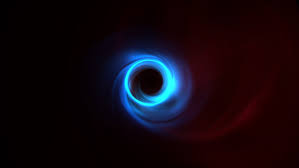

In [4]:
solar_plot(data,'text',top_higher=True,add_image=True,image_path=path)

### Well you can clearly the the top word in the middle followed by the other words revolving around it . Here the size of the revolving words depics the N frequency of the words.

<h1 style="background-color:#f5c0c0;">Word Cloud With Background Picture</h1>

### This is a function which will take in a link to any image on web and well will and a similar background to your wordcloud (just a better look) :)

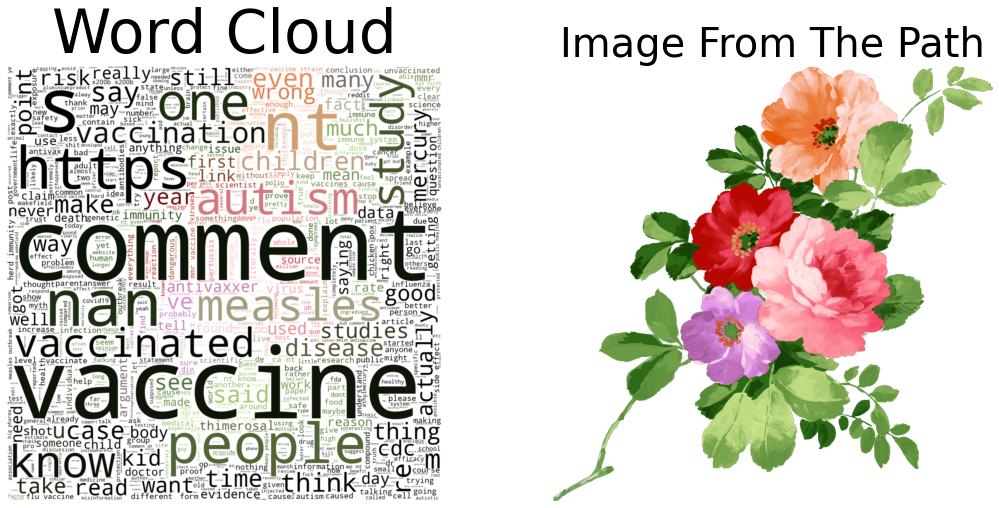

In [5]:
path='https://i.pinimg.com/originals/3b/f9/5e/3bf95e5f43941f3c48610d2736ae369b.png'
plt.figure(figsize=(18,8))
word=make_wordcloud(data,'text',image_path=path,title="Text Word Cloud")
plt.subplot(121,facecolor='w'),plt.imshow(word,interpolation='bilinear') ;
plt.title("Word Cloud",fontdict = {'fontsize' : 60})
plt.axis("off")
im=Image.open(requests.get(path, stream=True).raw)
im=np.array(im)
plt.subplot(122,facecolor='w'),plt.imshow(im) ;
plt.title("Image From The Path",fontdict = {'fontsize' : 40})
plt.axis("off") ;

### Here you can clearly see the word cloud having the similar color as the image on the right ( awesome right ) . <br> You can use either a link to the image or import the image from the directory . <br> Here the most used words in the dataset can easily be seen like vaccine , study , autism , etc . <br> which are all vaccine related myths or facts

<h1 style="background-color:#f5c0c0;">Length N Color Plot</h1>

### Plot depicting Text Length .Vs. Number of unique words corresponding it :)

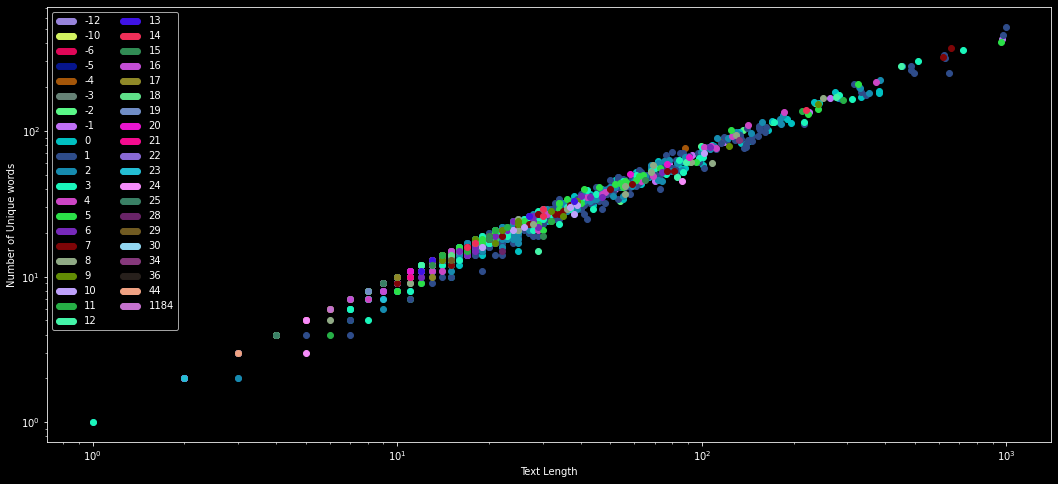

In [6]:
length_n_color(data,'text','score',template="dark")

<h1 style="background-color:#f5c0c0;">Parellal Word Chart</h1>

### This Plot depicts Next word on the basis of the probability of the next word occuring next to our inputted word from the whole data .

In [7]:
parellal_word_chart(data,'text',number_rows=2,number_cols=6,word='vaccine',preprocess_text=True)

### From this plot we can clearly see the most probable next words . <br>For example our first word was vaccine making the next probably word as either cause or t so if you see till the third probable word you will find the sentence as "vaccine cause autism" .<br> Btw is it true ? <br> Does vaccine cause autism, don't worry it doesn't it's a myth :)

<h1 style="background-color:#f5c0c0;">Sunburst Plot</h1>

### Plot with a similar idea from above

In [8]:
sunburst_plot(data,'text',number_cols=5)

### Sunburst plot depicting the next probable word using the sunburst plot . The results are same as the above plot :)

<h1 style="background-color:#f5c0c0;">Link Plot</h1>

### This plot helps us find the closest relatable words from the current word , like synonyms which are words with similar meaning used in similar situations . But in this case we are not working with meanings just the plot which depicts words which are used in similar scenarios a lot :)

In [9]:
Link_Plot(data,'text',word='vaccine',preprocess_text=True)

### Link plot shows words used in the similar scenarios . <br> Here we can clearly see vaccine(covid) used in the similar scenario as mmr which is the  vaccine against measles, mumps, and rubella which is further connected to cause / say / flu which is connected to the next layer words like autism which is disorder followed by pathogenic which is disease caused by virus/bacteria ,etc.

<h1 style="background-color:#f5c0c0;">Will keep on adding more plots in the future . <br> Hope you liked it <br>
Try out the utility script . <br> Happy Word Vizzing </h1>

![](https://i.pinimg.com/474x/c2/4f/c2/c24fc21a2ba2f9e8847616ae0424788f.jpg)